In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from matplotlib import pyplot as plt
import random
import time
# add all imports

In [2]:
mnist = np.load('/Users/mahadhassan/Documents/Coding/Projects/Digit Recognizer/mnist.npz')

train_images = mnist['x_train']
train_labels = mnist['y_train']

test_images = mnist['x_test']
test_labels = mnist['y_test']

# Classify all MNIST data into variables for ease of use later

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

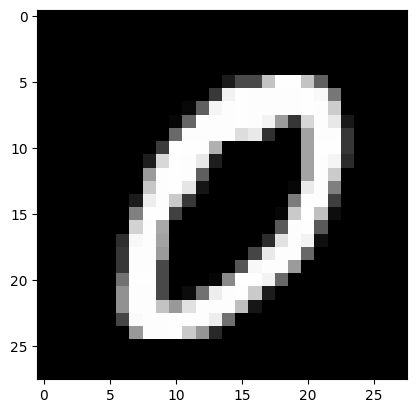

In [3]:
image_index = random.randint(0, 60000)

image = train_images[image_index]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

# simple function using matplotlib to display examples of data

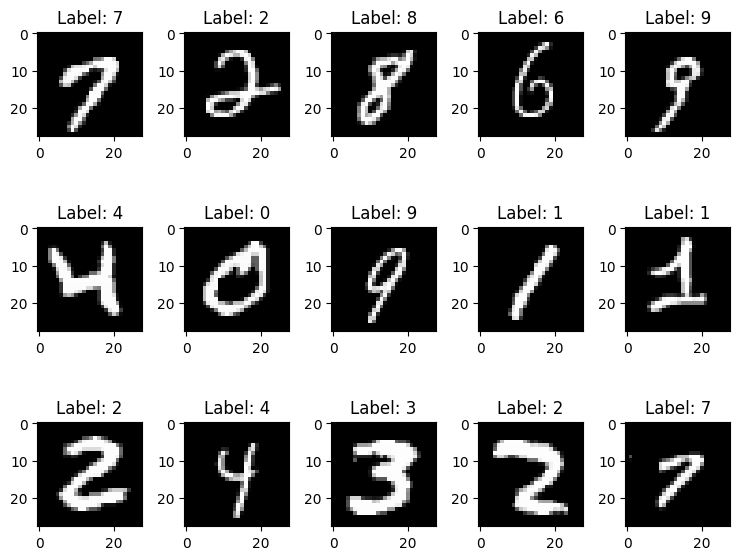

In [4]:
num = 30
initial = num - 15
images = train_images[initial:num]
labels = train_labels[initial:num]

num_row = 3
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(15):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# another function to display 15 images at once

In [5]:
train_images, test_images = train_images/255, test_images/255

# This code normalizes the images.
# For example, the original train_images variable had a structure such as:
# [[0, 0, 165, 255],
# [0, 120, 0, 255]]
# Normalizing this vector turns these values into values ranging from 0-1 making it easier for the model to decipher
# For example:
# [[0, 0, 0,8275, 1],
# [0, 0.54, 0, 1]]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# this is the model itself
# the 'layers.Conv2D..' lines are the convolution lines which simply add a filter to the images to make certain parts standout
# the 'MaxPooling2D..' lines basically cut down the size of the image so since we added a (2,2) pool function,
# for every 4 pixels, the function will choose the largest value
# this is then repeated to reach our final image


model.add(layers.Flatten()) # this line turns the 2D vector into 1D
model.add(layers.Dense(128, activation='relu')) # this compresses the image using the Relu function which disregards all values under 0
model.add(layers.Dense(10)) # lastly, this displays the 10 classes we have ranging from 0-9 in order to display the prediction for each number


In [7]:
model.summary()

# A nice summary of the model displaying how the image changes shape after passing through each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

# The compilation function. It uses 'adam' as the optimizer and calculates the loss along with accuracy of the model 

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data = (test_images, test_labels))

# Input the train/test images for however many epochs (more does not always mean better, after a certain number, the returns are minimal)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy', test_acc)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1416 - accuracy: 0.9568 - val_loss: 0.0522 - val_accuracy: 0.9839
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0332 - val_accuracy: 0.9901
313/313 - 1s - loss: 0.0332 - accuracy: 0.9901 - 786ms/epoch - 3ms/step

Test accuracy 0.9901000261306763


In [18]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

test_images.shape

# this function grabs the model's predictions for all the test images

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28)

In [10]:
predictions[0]

# the model's prediction are incomprehensible by humans as visisble by the first prediction

array([6.57273569e-10, 1.02950331e-07, 4.10827958e-08, 6.45828919e-08,
       1.09101194e-07, 1.27147903e-09, 6.59523261e-12, 9.99996781e-01,
       9.27222521e-10, 2.81937901e-06], dtype=float32)

In [16]:
print(np.argmax(predictions[0]))

# np.argmax simply returns the largest value in the dataset making it comprehensible for us

7


In [12]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap='gray')
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("Prediction: {} \nConfidence: {:2.0f}% \nActual: ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
    
    # plot_image() simply uses matplotlib to display the image along with a few key details under it
    

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks(range(0,101,10))
    plt.xlabel('Prediction')
    thisplot = plt.bar(range(10), 100*predictions_array, color= "#777777")
    plt.ylim([0,100])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    # plot_value_array() displays a bar graph displaying the models thought process showing the different 
    # numbers and their corresponding confidence levels

In [13]:
weird_indexes = []
wrong_indexes = []
for i in range(0, 10000):
    
    if np.max(predictions[i])<=0.99 and np.argmax(predictions[i]) == test_labels[i]:
        weird_indexes.append(i)
    
    if np.argmax(predictions[i]) != test_labels[i]:
        wrong_indexes.append(i)
        
# a simple function to attain all the 'weird' and incorrect indexes
# weird = model was confused
# incorrect = model guessed wrong

print(weird_indexes[:10])
print(wrong_indexes[:10])

[8, 36, 69, 78, 158, 167, 175, 195, 211, 215]
[115, 247, 340, 435, 551, 582, 583, 625, 659, 674]


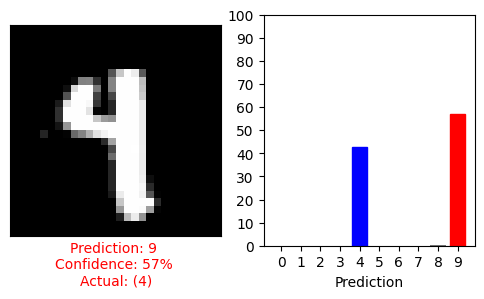

In [14]:
i = wrong_indexes[random.randrange(0, len(wrong_indexes))]  # replace i for any index between (0,10000) to test it out!
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

# plot_image() and plot_value_array() in action within a function for changing index values (i)

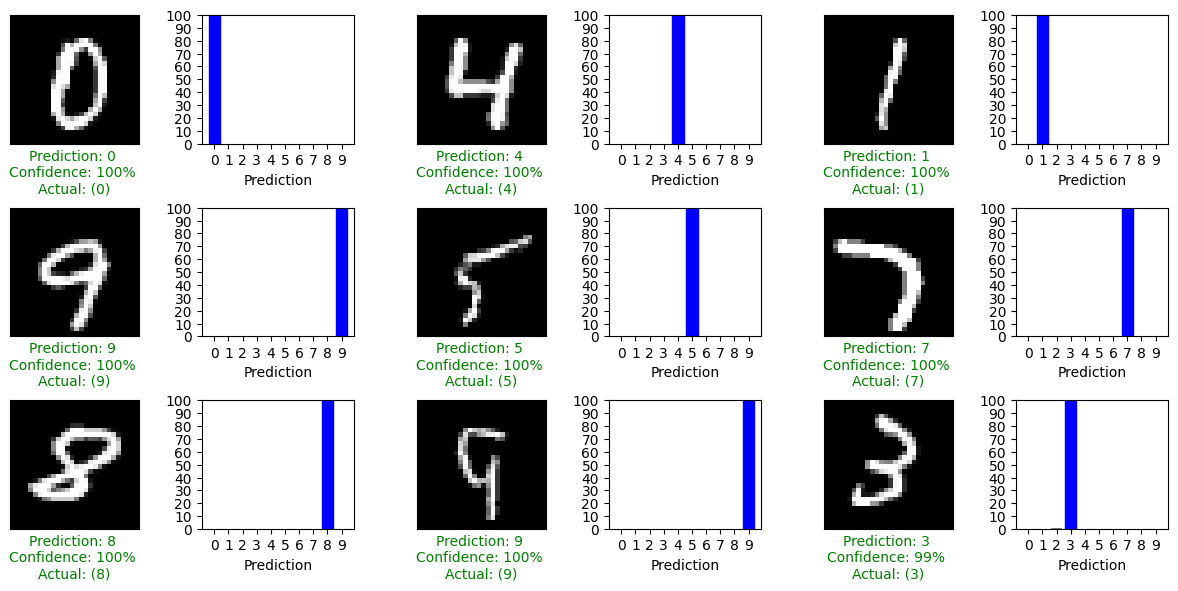

In [15]:
# A function to display the X number of predictions at a Y index
index = 63

j = 0
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols

initial = index - num_images

plt.figure(figsize=(4*num_cols, 2*num_rows))

for i in range(initial+1, index+1):
    
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_value_array(i, predictions[i], test_labels)
    j += 1
    
plt.tight_layout()
plt.show()